In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import spatial
import pickle
import gensim
import os
from scipy import spatial
%matplotlib inline

//anaconda/lib/python2.7/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [2]:
model = gensim.models.Word2Vec.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True) 

In [4]:
def avg_feature_vector(words, model, num_features):
        #function to average all words vectors in a given paragraph
        featureVec = np.zeros((num_features,), dtype="float32")
        nwords = 0

        #list containing names of words in the vocabulary
        #index2word_set = set(model.index2word) this is moved as input param for performance reasons
        for word in words:
            try:
                featureVec = np.add(featureVec, model[word])
                nwords = nwords+1
            except:
                pass

        if(nwords>0):
            featureVec = np.divide(featureVec, nwords)
        return featureVec

In [5]:
# opera, ski, music, beach, whale, diving, driving, fishing, hiking, snorkeling, opera, concert, gourmet, mountaineer
# relaxed, meditation, regal
# heritage
# waterfall, war, murder, beautiful, casino, swim, ice, forest, beer, spelunking, Canada
#? Okay: California green red fountain
#? Not so good: America
# Use for live demo: Family friendly, relaxation, beer, casino

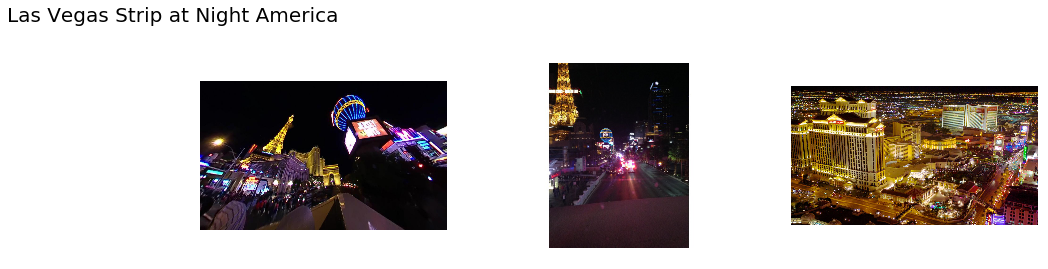

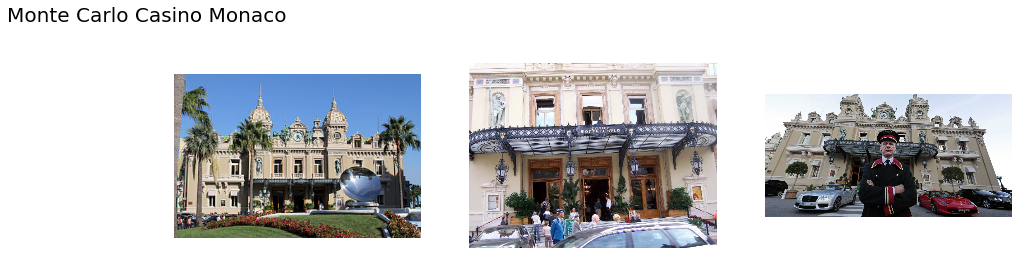

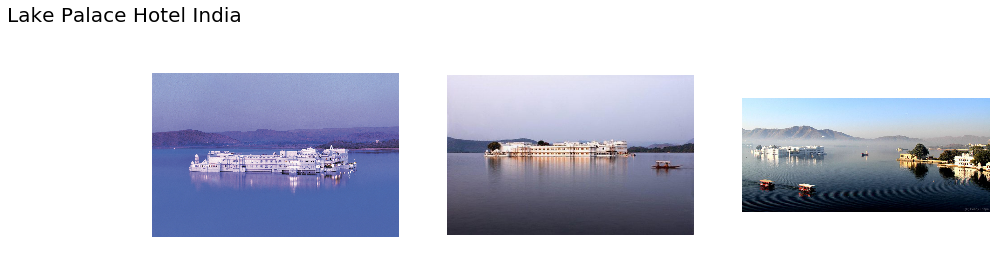

In [50]:
df = pd.read_csv('destinations_2.csv')
df = df.drop('Unnamed: 0', axis=1)

#--------- create vecs 1001x300
vecs = np.zeros([df.shape[0], 300])
vecs_sr = df['details'].apply(lambda x: avg_feature_vector(x.split(), model=model, num_features=300))

vect = []
for vec in vecs_sr:
    vect.extend(vec)
vecs = np.array(vect).reshape([df.shape[0], 300])

#---------- find closest vec in vecs to target: top_ix
target = ''
target_vec = avg_feature_vector(target.split(), model=model, num_features=300)

target_to_vec_list = []
for vec in vecs:
    target_to_vec = 1 - spatial.distance.cosine(target_vec ,vec)
    target_to_vec_list.append(target_to_vec)

top_choices = sorted(zip(target_to_vec_list, range(len(target_to_vec_list))), key = lambda x:-x[0])[0:5]
top_ix  = [top_c[1] for top_c in top_choices]


for rank_ix in range(3):
    rank_name = df.loc[top_ix[rank_ix], 'location']
    rank_details = df.loc[top_ix[rank_ix], 'details']

    selection_list = []
    image_list = os.listdir('./Images_selected/')
    for im in image_list:
        if rank_name in im:
            selection_list.append(im)

    photo_total_num = len(selection_list)
    photo_list = ['./0_original_Images/' + selection for selection in selection_list]
    
    if len(photo_list) > 2:
        img0 = mpimg.imread(photo_list[0])
        img1 = mpimg.imread(photo_list[1])
        img2 = mpimg.imread(photo_list[2])
    elif len(photo_list) == 2:
        img0 = mpimg.imread(photo_list[0])
        img1 = mpimg.imread(photo_list[1])
        img2 = mpimg.imread(photo_list[1])
    else:
        img0 = mpimg.imread(photo_list[0])
        img1 = mpimg.imread(photo_list[0])
        img2 = mpimg.imread(photo_list[0])
    #print(rank_name)
    
    fig, ax = plt.subplots(1, 3, figsize = (15, 15))
    ax[0].imshow(img0);
    ax[0].axis('off');
    ax[1].imshow(img1);
    ax[1].axis('off');
    ax[2].imshow(img2);
    ax[2].axis('off');
    
    plt.suptitle(rank_name.decode('utf-8'), x = 0.1, y = 0.65, fontsize = 20)
    
    #print(rank_details)

In [150]:
rank_name

'Nuku Hiva French Polynesia'

In [116]:
from sklearn.cluster import KMeans
from scipy.spatial import cKDTree

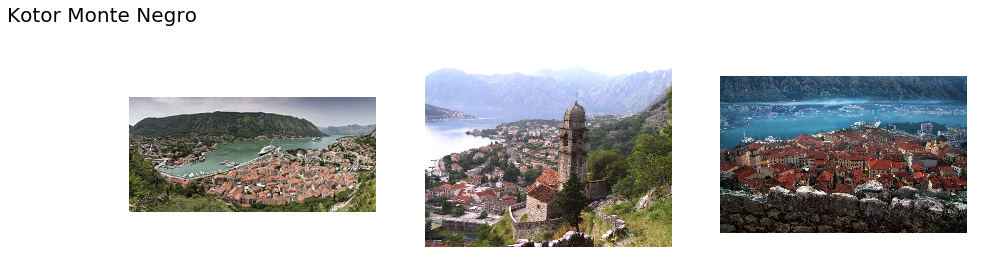

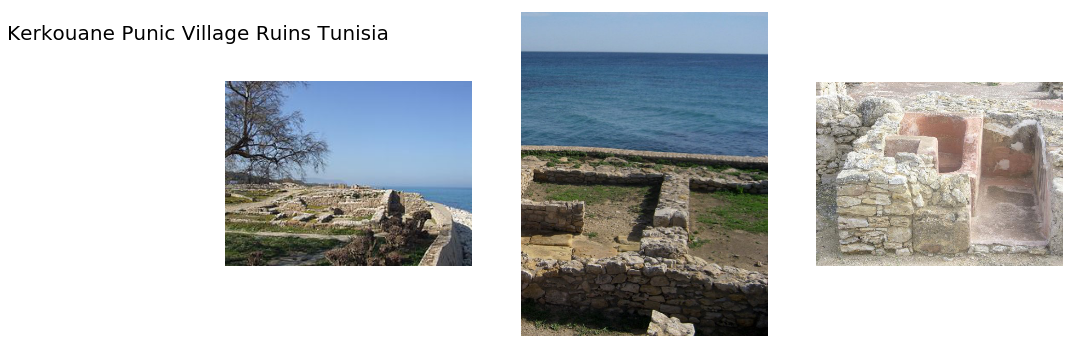

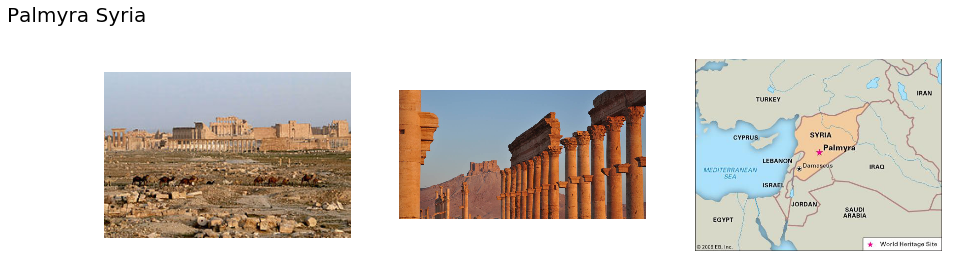

In [213]:
test_location = 651
num_neighbor = 3

tree = cKDTree(vecs)

cKD_dist, cKD_index = tree.query(np.array(vecs[test_location,:]), k=num_neighbor)

location_list = df['location'].tolist()

details_list = df['details'].tolist()

closest_list = [location_list[cKD_ix] for cKD_ix in cKD_index]

closest_list

ix = cKD_index

for ix0 in ix:
    rank_name = df.loc[ix0, 'location']
    rank_details = df.loc[ix0, 'details']

    selection_list = []
    image_list = os.listdir('./0_original_Images/')
    for im in image_list:
        if rank_name in im:
            selection_list.append(im)

    photo_total_num = len(selection_list)
    photo_list = ['./0_original_Images/' + selection for selection in selection_list]

    img0 = mpimg.imread(photo_list[0])
    img1 = mpimg.imread(photo_list[1])
    img2 = mpimg.imread(photo_list[2])

    #print(rank_name)
    
    fig, ax = plt.subplots(1, 3, figsize = (15, 15))
    ax[0].imshow(img0);
    ax[0].axis('off');
    ax[1].imshow(img1);
    ax[1].axis('off');
    ax[2].imshow(img2);
    ax[2].axis('off');
    
    plt.suptitle(rank_name.decode('utf-8'), x = 0.1, y = 0.65, fontsize = 20)
    
    #print(rank_details)